<a href="https://colab.research.google.com/github/ditorizkyka/TA-Pothole-Detection-Computer-Vision/blob/main/TA_RTDETR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RT-DETR Pothole Detection (Comparison Model)

Bagian ini menjelaskan implementasi RT-DETR (Real-Time Detection Transformer) sebagai model pembanding dalam tugas deteksi lubang jalan. RT-DETR dipilih untuk merepresentasikan pendekatan transformer-based object detection, sehingga memungkinkan analisis perbandingan antara kemampuan pemodelan konteks global dan efisiensi inferensi dibandingkan model berbasis CNN seperti YOLO.

# Experimental Setup
Bagian ini menjelaskan lingkungan eksperimen yang digunakan untuk pelatihan dan evaluasi RT-DETR, meliputi platform komputasi, spesifikasi perangkat keras (GPU), serta framework dan dependensi yang digunakan. Seluruh konfigurasi eksperimen disamakan dengan model lain untuk memastikan perbandingan performa yang adil dan objektif.

In [ ]:
!nvidia-smi

!pip install ultralytics wandb


Mon Nov 10 04:28:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Collection (Pengumpulan Data)

Bagian ini menguraikan dataset yang digunakan dalam eksperimen RT-DETR, termasuk sumber data, jumlah citra, serta variasi kondisi lingkungan seperti pencahayaan dan tekstur permukaan jalan. Dataset yang digunakan sama dengan model utama dan model pembanding lainnya guna menjaga konsistensi evaluasi.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0g1oLVsmKRymF1NXsqeU")
project = rf.workspace("arthana-dbw2b").project("pothole-detection-th8es")
version = project.version(9)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


# Data Splitting (Pembagian Data)

Bagian ini menjelaskan proses pembagian dataset menjadi data latih (training), validasi (validation), dan pengujian (testing) dengan proporsi yang sama seperti eksperimen model lain. Strategi ini memastikan bahwa perbedaan hasil performa disebabkan oleh perbedaan arsitektur model, bukan oleh variasi data.

In [ ]:
import os

for split in ["train","valid","test"]:
    print(split, len(os.listdir(f"Pothole-detection-9/{split}/images")))

train 3028
valid 670
test 533


In [ ]:
os.listdir(f"Pothole-detection-9/train/images")

['20240223_125533_mp4-0459_jpg.rf.480ad1e285fb711ba77b8c8505e26342.jpg',
 '20240223_125533_mp4-0046_jpg.rf.af536f7e3e900b4d9410fc74967e3d0e.jpg',
 '20240223_125533_mp4-1774_jpg.rf.fe3ea6fd04c6b6eeb28b66b24a82dbc8.jpg',
 'IMG_1887_MOV-0026_jpg.rf.7f127ff9d37c6dcabeab3009539fe02c.jpg',
 'IMG_1887_MOV-0033_jpg.rf.ff76d0f3a214912edefcbcaa6feba83f.jpg',
 '20240223_124911_mp4-0172_jpg.rf.a681a8873758e8d060a12b64d5a26ebc.jpg',
 '20240223_124911_mp4-0771_jpg.rf.bfd14632b3a44b38b14d901d3812a1f0.jpg',
 '20240223_125533_mp4-3026_jpg.rf.3547dcdc214650c068661a8395451bc5.jpg',
 '20240223_124911_mp4-2464_jpg.rf.facb452d12da75ed603d0058be576b1e.jpg',
 '20240223_124911_mp4-0399_jpg.rf.5dcc24a0665fb6e91fd9b990f3df9745.jpg',
 'IMG_1889_MOV-0127_jpg.rf.b4d732bce603a2ceca576040fb89764f.jpg',
 '20240223_125533_mp4-1416_jpg.rf.5edbce2002f795482c1c09cc46c81f13.jpg',
 '20240223_124911_mp4-1144_jpg.rf.3c19c370f90ce3998e9e11ddf5ea423a.jpg',
 '20240223_125533_mp4-0456_jpg.rf.8603ce51a47dbc0935ca43d559431d29.jpg',

In [ ]:
!cp -r /content/drive/MyDrive/rtdetr_session1 runs/detect/


# Model Training (Default Parameter / Baseline)

Bagian ini menjelaskan proses pelatihan awal RT-DETR menggunakan konfigurasi default tanpa optimasi tambahan. Hasil pelatihan ini digunakan sebagai baseline performance untuk mengevaluasi kemampuan awal RT-DETR dalam mendeteksi lubang jalan sebelum dilakukan tuning lebih lanjut.

In [ ]:
from ultralytics import RTDETR

model = RTDETR("runs/detect/rtdetr_session1/weights/last.pt")
model.train(
    data="Pothole-detection-9/data.yaml",
    epochs=50,   # total epoch target
    resume=True  # lanjut dari epoch terakhir
)


Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Pothole-detection-9/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/rtdetr_session1/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rtdetr_session1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, 

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      13/50      6.79G      3.798    0.01814      5.661          6        640: 100% ━━━━━━━━━━━━ 379/379 1.6it/s 3:54
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 2.6it/s 16.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      14/50      7.18G      3.749  0.0006602      5.423         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      14/50      7.28G      3.836  0.0008549      5.914          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:38
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.6it/s 11.5s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      15/50      7.28G      3.544  0.0008447      5.441         13        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      15/50      7.37G      3.835  0.0008437      5.953          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:42
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.6it/s 11.6s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      16/50      7.37G      3.723   0.001165      4.648          9        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      16/50      7.46G      3.833   0.000817      5.907          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:41
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.6it/s 11.6s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      17/50      6.82G      3.484   0.001023      4.632         11        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      17/50      6.94G      3.838  0.0008462      5.935          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.6it/s 11.8s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      18/50      6.94G      3.891  0.0008957      6.856         11        640: 0% ──────────── 0/379  0.9s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      18/50      6.98G      3.836  0.0008363      5.946          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:41
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.6it/s 11.7s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      19/50         7G      3.946   0.001179      5.686          9        640: 0% ──────────── 0/379  0.8s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      19/50      7.12G        nan        nan        nan          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.6it/s 11.6s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      20/50      7.12G       3.93    0.00104      6.532         10        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      20/50      7.21G      3.833  0.0008291      5.915          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.6it/s 11.7s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      21/50      7.21G      3.788  0.0009443      4.796         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      21/50      7.34G      3.841  0.0008537      5.916         10        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:41
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.5s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      22/50      7.39G      3.799   0.001296      6.082          8        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      22/50      7.53G      3.827  0.0008352      5.929          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:43
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.5s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      23/50      6.85G      3.813  0.0009182      5.551         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      23/50      6.86G      3.832  0.0008501      5.888          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      24/50      6.86G      3.906   0.000915      6.045         11        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      24/50      6.95G      3.833  0.0008345      5.901          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:41
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      25/50      6.95G      3.918  0.0005705      6.029         18        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      25/50      7.04G        nan        nan        nan          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      26/50      7.04G       3.77  0.0009253       4.98         11        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      26/50      7.07G      3.831  0.0008562      5.956          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      27/50      7.19G      3.768   0.001744      5.546          6        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      27/50      7.36G      3.832  0.0008342       5.96          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      28/50       7.4G      3.913  0.0008706      5.894         12        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      28/50      7.54G      3.838  0.0008483      5.941          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.5s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      29/50      6.89G      3.859  0.0007358      5.426         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      29/50      6.89G      3.829  0.0008434      5.885          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.3s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      30/50      6.89G      3.797  0.0007247       7.02         14        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      30/50      6.93G      3.827  0.0008469      5.927          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.3s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      31/50      6.93G      3.791  0.0009941      6.242         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      31/50      7.02G       3.83  0.0008219      5.911          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:38
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      32/50      7.02G      3.939   0.001805      6.507          6        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      32/50      7.16G      3.828   0.000834      5.955         11        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.5s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      33/50      7.21G       3.83  0.0008202      5.476         13        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      33/50      7.34G      3.827  0.0008365      5.907          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.5s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      34/50      7.39G      3.942  0.0006433      5.908         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      34/50      7.48G      3.832   0.000816      5.908          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      35/50      6.88G      3.858  0.0008541      5.538         12        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      35/50      6.88G      3.839  0.0008388      5.914          9        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      36/50      6.88G      3.805  0.0005869      6.028         17        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      36/50      6.93G      3.846  0.0008382      5.981          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.5s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      37/50      6.93G      3.888   0.001149      6.022          9        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      37/50      7.02G      3.839  0.0008275      5.951         16        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.5s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      38/50      7.02G      3.758   0.000654       5.44         15        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      38/50      7.16G      3.835   0.000843       5.91          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.3s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      39/50      7.21G      3.871  0.0007448      6.262         14        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      39/50      7.34G      3.833  0.0008278       5.95          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.5s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      40/50      7.34G      3.688   0.001131      6.115          9        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      40/50      7.53G        nan        nan        nan         11        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      41/50      6.86G      3.874   0.001277      6.238          8        640: 0% ──────────── 0/379  1.3s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      41/50      6.86G      3.919   0.001191      6.579          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.5s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      42/50      6.86G      3.938  0.0008167      5.866         12        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      42/50      6.88G      3.918   0.001186      6.566          3        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.5s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      43/50       6.9G      3.854    0.00132      6.631          8        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      43/50      7.02G       3.92   0.001187      6.581          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      44/50      7.02G       3.94   0.001189      5.285          9        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      44/50      7.11G      3.919   0.001184       6.58          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.3s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      45/50       7.2G      3.917   0.001026      7.285         11        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      45/50      7.34G      3.918   0.001189      6.584          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      46/50      7.39G      3.948   0.001019      6.022         10        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      46/50      7.52G       3.92   0.001182      6.605          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      47/50      6.98G      3.895   0.001053      6.253         11        640: 0% ──────────── 0/379  0.5s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      47/50      6.98G      3.918   0.001177      6.593          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      48/50      6.98G      3.887   0.001396      6.291          8        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      48/50      7.03G      3.918   0.001182      6.576          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:38
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      49/50      7.03G      3.972   0.000977      6.806         10        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      49/50      7.12G      3.919   0.001192      6.591          3        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.4s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      50/50      7.12G      3.942   0.001295      7.035          8        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      50/50      7.16G      3.917   0.001192      6.565          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.7it/s 11.5s
                   all        670        786          0          0          0          0

38 epochs completed in 2.456 hours.
Optimizer stripped from /content/runs/detect/rtdetr_session1/weights/last.pt, 66.2MB
Optimizer stripped from /content/runs/detect/rtdetr_session1/weights/best.pt, 66.2MB

Validating /content/runs/detect/rtdetr_session1/weights/best.pt...
Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.1it/s 13.5s
                   all        670        786      0.781      0.627      0.682      0.284
Speed: 0.3

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d3a0ca98fe0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Hyperparameter Tuning

Bagian ini membahas proses penyesuaian hyperparameter RT-DETR untuk meningkatkan performa deteksi. Penyesuaian dilakukan pada parameter seperti learning rate, jumlah epoch, dan ukuran batch, dengan mempertimbangkan kompleksitas komputasi yang lebih tinggi pada arsitektur transformer.

In [ ]:
import os
import time
import shutil
from pathlib import Path
from ultralytics import YOLO, RTDETR

# ====== KONFIGURASI DASAR ======
DATA = "Pothole-detection-9/data.yaml"
DRIVE_DIR = "/content/drive/MyDrive/09 LMS TELKOM UNIVERSITY/TAHUN 4/Download/00-TA/GRID SEARCH"

# Buat folder penyimpanan hasil
os.makedirs(DRIVE_DIR, exist_ok=True)
print(f"📁 Drive folder siap: {DRIVE_DIR}")

COMMON_ARGS = dict(
    optimizer="AdamW",        # ✅ cocok untuk Transformer
    weight_decay=5e-4,
    project="pothole_grid_adamw_rtdetr",
    seed=42,
    device=0
)

📁 Drive folder siap: /content/drive/MyDrive/09 LMS TELKOM UNIVERSITY/TAHUN 4/Download/00-TA/GRID SEARCH


# Tuning with Grid Method

In [ ]:
# ====== KOMBINASI EKSPERIMEN (Grid Search) ======
experiments = [
    {"batch": 8, "lr0": 0.001, "epochs": 80, "name": "rtdetr_bs8_lr001_ep80_adamw"},
    {"batch": 8, "lr0": 0.0001, "epochs": 80, "name": "rtdetr_bs8_lr0001_ep80_adamw"},
    {"batch": 16, "lr0": 0.001, "epochs": 80, "name": "rtdetr_bs16_lr001_ep80_adamw"},
    {"batch": 16, "lr0": 0.0001, "epochs": 80, "name": "rtdetr_bs16_lr0001_ep80_adamw"},
]

# ====== JALANKAN SEMUA KOMBINASI ======
for exp in experiments:
    model = RTDETR("rtdetr-l.pt")
    print(f"\n🚀 Mulai training: {exp['name']}")
    start = time.time()

    # Training
    results = model.train(
        model="rtdetr-l.pt",       # ✅ tambahkan model path agar tidak KeyError
        data=DATA,
        batch=exp["batch"],
        epochs=exp["epochs"],
        lr0=exp["lr0"],
        name=exp["name"],
        **COMMON_ARGS
    )

    end = time.time()
    durasi = (end - start) / 60
    print(f"✅ Selesai: {exp['name']} dalam {durasi:.2f} menit")

    # Simpan hasil ke Google Drive
    local_dir = Path(results.save_dir)
    drive_dest = Path(DRIVE_DIR) / local_dir.name
    shutil.copytree(local_dir, drive_dest, dirs_exist_ok=True)
    print(f"📂 Hasil disalin ke: {drive_dest}")


🚀 Mulai training: rtdetr_bs8_lr001_ep80_adamw
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Pothole-detection-9/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rtdetr_bs8_lr001_ep80_adamw, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW,

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       1/80      7.22G     0.8793      1.254     0.2813          6        640: 100% ━━━━━━━━━━━━ 379/379 1.6it/s 3:55
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786     0.0524      0.394     0.0584     0.0178

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       2/80      7.23G      0.586      1.137     0.1686         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       2/80       7.4G     0.6519      1.063     0.1697          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:49
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.104      0.392      0.101     0.0387

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       3/80      7.49G      0.704      0.889     0.2128         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       3/80      7.61G     0.4868      1.041     0.1352          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.233      0.314      0.186     0.0777

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       4/80      7.48G     0.2953      1.189     0.1431          9        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       4/80       7.6G     0.4975     0.7415     0.1439          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.5it/s 12.2s
                   all        670        786       0.66       0.62      0.582      0.224

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       5/80       7.5G      0.436     0.5453     0.1095         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       5/80      7.56G     0.4937      0.588     0.1465          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.667      0.605      0.578      0.226

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       6/80      7.49G     0.7774      0.544     0.3817         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       6/80      7.61G     0.5107     0.6062     0.1553          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.633      0.613      0.566      0.222

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       7/80      7.49G     0.5032     0.5924     0.1409          9        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       7/80      7.61G     0.4832      0.532     0.1471          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.649      0.542      0.541      0.205

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       8/80      7.39G     0.4469     0.4382     0.1449         10        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       8/80      7.51G     0.4508     0.5247     0.1328          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.625      0.622      0.574      0.236

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       9/80       7.4G     0.4926     0.4774    0.06717         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       9/80      7.52G     0.4476     0.5056     0.1303         10        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.596      0.606      0.504      0.195

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      10/80      7.49G     0.4168     0.3194     0.2443          8        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      10/80      7.61G     0.4326     0.5044     0.1271          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786       0.72      0.617      0.639       0.27

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      11/80       7.4G     0.1784     0.4255    0.03534         11        640: 0% ──────────── 0/379  0.8s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      11/80      7.57G     0.4348     0.4995     0.1284          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.678      0.668      0.661      0.277

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      12/80      7.49G     0.3348     0.6201    0.08446         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      12/80       7.6G     0.4086     0.5238     0.1187          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.536      0.314      0.386      0.172

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      13/80      7.49G      0.377     0.8319    0.06815         18        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      13/80      7.56G     0.4054     0.5786     0.1225          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.688      0.635      0.637      0.285

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      14/80       7.4G     0.5583     0.4022     0.2063         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      14/80      7.51G     0.4222     0.4801     0.1244          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.755       0.63      0.643      0.277

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      15/80      7.49G     0.4903     0.6207     0.1533          6        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      15/80      7.61G     0.4169     0.4803     0.1214          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.602      0.688      0.614      0.256

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      16/80       7.4G     0.4559     0.4984      0.114         12        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      16/80      7.52G     0.4101     0.4584     0.1238          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.724      0.652      0.647       0.28

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      17/80      7.49G     0.5587     0.5508     0.1026         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      17/80      7.61G     0.3842      0.445     0.1143          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.746        0.7      0.676      0.297

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      18/80      7.49G     0.3733     0.6029     0.1236         14        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      18/80      7.61G     0.4138     0.4637     0.1215          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.692      0.636      0.642      0.273

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      19/80      7.38G     0.3484     0.4202    0.08798         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      19/80      7.54G     0.3939     0.4683     0.1092          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.794      0.595      0.659      0.296

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      20/80       7.5G     0.3384     0.5203    0.09343          6        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      20/80      7.62G      0.391     0.4865     0.1115         11        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786       0.53      0.553      0.536      0.246

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      21/80      7.39G     0.4084      1.159     0.1123         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      21/80      7.46G     0.4013     0.4623     0.1176          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.691      0.624      0.659      0.272

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      22/80       7.5G     0.2452     0.3035    0.03594         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      22/80      7.62G     0.3962     0.4392     0.1127          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.715      0.669      0.661      0.262

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      23/80       7.5G     0.3242     0.3906    0.06371         12        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      23/80      7.62G      0.398     0.4358     0.1163          9        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.713      0.664      0.677      0.283

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      24/80       7.5G      0.286     0.4526    0.07253         17        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      24/80      7.62G     0.3939     0.4647     0.1133          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.622      0.675       0.58      0.253

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      25/80      7.49G     0.2659     0.5097    0.03608          9        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      25/80      7.61G     0.3774     0.4225     0.1076         16        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.698      0.715      0.692      0.294

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      26/80      7.49G     0.3356     0.4001    0.07056         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      26/80      7.61G     0.3747     0.4061     0.1059          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.741      0.668      0.679      0.275

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      27/80       7.5G     0.3955     0.4287     0.1053         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      27/80      7.66G     0.3718     0.4151     0.1063          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.753      0.729      0.729      0.317

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      28/80      7.39G     0.3772     0.3357       0.12          9        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      28/80      7.51G     0.3848     0.3958     0.1075         11        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786       0.73      0.684       0.69      0.285

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      29/80       7.5G      0.368     0.3599     0.1019         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      29/80      7.56G     0.3712      0.407     0.1036          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.5it/s 12.2s
                   all        670        786      0.701      0.684      0.677      0.294

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      30/80       7.4G     0.3771     0.3862     0.1166         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      30/80      7.52G     0.3792      0.406     0.1099          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786       0.77      0.714      0.725      0.314

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      31/80       7.5G     0.2578     0.2846    0.04898         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      31/80      7.62G     0.3616     0.3933     0.1044          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.718      0.694      0.698      0.292

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      32/80       7.5G     0.2738     0.2557    0.05213         12        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      32/80      7.62G     0.3609     0.4043     0.1017          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.739      0.681      0.671      0.287

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      33/80      7.49G     0.2859     0.3525    0.04744         17        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      33/80      7.61G     0.3585     0.3887    0.09867          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.749      0.686      0.697      0.297

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      34/80      7.49G     0.3501     0.4095    0.08365         10        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      34/80      7.61G     0.3596     0.3851     0.1023          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.762       0.69      0.704      0.295

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      35/80      7.48G     0.1828     0.2645    0.02334         23        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      35/80      7.64G      0.363     0.3851     0.1039         10        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786       0.71      0.627      0.632      0.275

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      36/80      7.49G     0.2939     0.3878    0.06992         17        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      36/80      7.61G     0.3616      0.395     0.1017          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.736      0.712      0.696      0.296

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      37/80      7.39G     0.3575     0.3253     0.1124         10        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      37/80      7.46G     0.3528     0.3886      0.102          3        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.756      0.677      0.711      0.311

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      38/80       7.5G     0.4666     0.5692     0.1866         16        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      38/80      7.62G     0.3476     0.3792        0.1          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.768       0.71      0.722      0.313

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      39/80      7.39G     0.4268     0.4245     0.1118         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      39/80      7.51G     0.3445     0.3825    0.09592          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.779      0.692      0.725      0.322

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      40/80      7.49G     0.3643     0.3624    0.05793         15        640: 0% ──────────── 0/379  0.8s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      40/80      7.61G      0.344     0.3921    0.09596          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.758      0.698      0.689      0.304

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      41/80      7.49G     0.2648     0.4216    0.06815         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      41/80      7.61G     0.3457     0.4006    0.09751          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.746      0.646       0.69      0.299

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      42/80      7.49G      0.426     0.4598    0.08262         16        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      42/80      7.61G     0.3392     0.3961    0.09533         10        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.763      0.711      0.713      0.318

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      43/80      7.37G     0.2293     0.2664    0.07385          8        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      43/80      7.53G     0.3401     0.3804    0.09538          3        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.778      0.657       0.71      0.314

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      44/80      7.49G     0.2396     0.2573    0.04917         12        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      44/80      7.61G      0.345     0.4175    0.09548          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.727       0.71       0.69      0.313

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      45/80      7.49G     0.3382     0.3316     0.1088         10        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      45/80      7.56G     0.3415     0.3856    0.09588          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.735      0.723      0.693      0.306

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      46/80      7.48G     0.2656     0.3888    0.06832         20        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      46/80       7.6G      0.341     0.3717    0.09559          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.714        0.7      0.711      0.301

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      47/80      7.39G      0.265     0.3777    0.05502         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      47/80      7.51G     0.3388     0.3786    0.09557          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.744      0.687      0.683      0.296

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      48/80      7.48G      0.381     0.3609    0.06671         15        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      48/80       7.6G     0.3315     0.3709    0.09621          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.751      0.706      0.709      0.298

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      49/80      7.49G     0.2285      0.436    0.04821          8        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      49/80      7.61G       0.33     0.3535    0.09675          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786       0.77      0.738      0.734      0.311

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      50/80      7.48G     0.4269     0.3825     0.1614         12        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      50/80       7.6G     0.3295     0.3571    0.08728          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.754      0.725      0.715      0.309

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      51/80       7.5G     0.2368     0.2812    0.07684         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      51/80      7.66G     0.3253     0.3487    0.08981          3        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.765       0.72      0.711      0.315

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      52/80       7.5G     0.3892     0.4631     0.1006         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      52/80      7.62G     0.3319     0.3486    0.09525          9        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.777      0.742      0.747      0.333

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      53/80      7.49G     0.3578     0.4479     0.1044         13        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      53/80      7.55G     0.3213     0.3481    0.08991          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.772       0.73       0.73      0.323

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      54/80      7.49G     0.3114     0.6738     0.1024         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      54/80      7.61G     0.3277     0.3629    0.08908          9        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.741      0.738      0.729      0.327

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      55/80       7.4G     0.5015     0.4398     0.1266          9        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      55/80      7.52G     0.3233     0.3465    0.08516          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.794      0.733      0.733      0.332

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      56/80      7.46G     0.4529     0.3724     0.1058         17        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      56/80      7.58G      0.322     0.3507    0.08761          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.765      0.731      0.713      0.317

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      57/80      7.48G     0.2849     0.2766    0.05392         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      57/80       7.6G     0.3113     0.3432    0.08729          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.754      0.746      0.724      0.323

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      58/80       7.5G      0.403     0.3554    0.06725         10        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      58/80      7.62G     0.3176     0.3365    0.08703         10        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.759       0.73      0.716      0.322

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      59/80       7.5G       0.23     0.3491    0.06902         10        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      59/80      7.66G     0.3105     0.3378    0.08319         13        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.5it/s 12.1s
                   all        670        786      0.787      0.745      0.733      0.321

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      60/80      7.39G     0.3067     0.3661    0.07924         18        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      60/80      7.51G     0.3111     0.3366    0.08331          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.808      0.728      0.742      0.327

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      61/80       7.4G     0.2723     0.2687    0.09803          9        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      61/80      7.46G      0.307     0.3338    0.08448          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786        0.8      0.705      0.725      0.323

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      62/80      7.42G     0.3134     0.2849    0.06137         17        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      62/80      7.54G     0.3038     0.3288    0.08355          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.798       0.73       0.72      0.325

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      63/80      7.49G     0.3602     0.3689     0.1044         14        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      63/80      7.62G      0.311     0.3316    0.08443         10        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.795      0.738      0.739      0.329

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      64/80      7.49G     0.3245     0.2736    0.07873          8        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      64/80      7.61G     0.3032     0.3297    0.08653          9        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.753      0.739      0.723      0.317

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      65/80      7.49G     0.1909     0.2517    0.04786         16        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      65/80      7.61G     0.3076     0.3243    0.08524          9        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:43
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.808      0.714      0.734      0.328

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      66/80       7.5G     0.1788     0.2728    0.06351          6        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      66/80      7.62G      0.296     0.3245     0.0806          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.806       0.73      0.734      0.321

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      67/80      7.27G     0.3165     0.3331     0.0731         18        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      67/80      7.43G     0.3003     0.3261    0.07957          2        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.783      0.737      0.722      0.318

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      68/80       7.4G     0.3523     0.2938    0.06453         16        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      68/80      7.52G      0.292     0.3243    0.07677         14        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.784      0.743       0.73      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      69/80      7.36G     0.3097     0.3444    0.05828         18        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      69/80      7.42G     0.3005     0.3184     0.0801         10        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786        0.8      0.741      0.739      0.326

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      70/80       7.4G     0.2739      0.313    0.07683         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      70/80      7.52G     0.2822     0.3109    0.07668          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.782      0.743      0.734       0.32
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      71/80      7.48G     0.5447     0.3757      0.314          8        640: 0% ──────────── 0/379  1.2s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      71/80       7.6G     0.2806     0.2985    0.08818          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786       0.79      0.733      0.725      0.321

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      72/80      7.39G     0.2597     0.3262      0.119          9        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      72/80      7.51G     0.2752     0.2965    0.08234          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.5it/s 12.2s
                   all        670        786      0.791      0.743      0.734      0.322

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      73/80      7.49G     0.3957     0.3319     0.1015          9        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      73/80      7.61G     0.2693     0.2925    0.08225          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.823       0.71       0.74       0.33

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      74/80      7.39G     0.4406     0.2855     0.1111          9        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      74/80      7.51G     0.2662     0.2871    0.08157          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.794      0.721      0.715      0.321

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      75/80      7.37G     0.2543       0.26    0.06779          8        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      75/80      7.53G      0.263     0.2871    0.08041          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.776       0.74      0.731       0.33

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      76/80       7.5G     0.2648      0.263     0.0419          7        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      76/80      7.61G     0.2679     0.2865    0.08101          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.795      0.734      0.727      0.323

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      77/80      7.39G     0.2217      0.213    0.06637         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      77/80      7.46G     0.2623     0.2844    0.07948          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.787      0.754      0.737      0.328

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      78/80      7.38G     0.4965     0.4163     0.2853         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      78/80       7.5G     0.2598     0.2805     0.0766          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.797       0.74      0.724      0.316

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      79/80       7.5G     0.2221     0.2414    0.08359         10        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      79/80      7.62G     0.2598     0.2797    0.07732          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.785      0.747      0.731      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      80/80      7.48G      0.277     0.3261    0.09923         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      80/80       7.6G     0.2582     0.2825    0.07806          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.792      0.747      0.729      0.323

80 epochs completed in 5.407 hours.
Optimizer stripped from /content/pothole_grid_adamw_rtdetr/rtdetr_bs8_lr001_ep80_adamw/weights/last.pt, 66.2MB
Optimizer stripped from /content/pothole_grid_adamw_rtdetr/rtdetr_bs8_lr001_ep80_adamw/weights/best.pt, 66.2MB

Validating /content/pothole_grid_adamw_rtdetr/rtdetr_bs8_lr001_ep80_adamw/weights/best.pt...
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.3it/s 12.7s
                   al

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       1/80      7.34G     0.9551      1.245     0.3377          6        640: 100% ━━━━━━━━━━━━ 379/379 1.6it/s 3:57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.039      0.354     0.0355    0.00967

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       2/80      7.33G     0.6512      1.127     0.1549         15        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       2/80      7.49G     0.5889      1.168     0.1576          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:49
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786     0.0595      0.351     0.0556     0.0258

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       3/80       7.4G     0.7955     0.9541     0.2359         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       3/80      7.52G     0.4787      1.195     0.1261          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.148      0.294      0.114     0.0452

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       4/80      7.39G     0.2312      1.321    0.06133          9        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       4/80      7.51G     0.4559      1.002     0.1207          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.167       0.42      0.143     0.0605

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       5/80      7.49G     0.4176     0.9042    0.09926         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       5/80      7.56G     0.4561     0.8298     0.1265          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.672      0.651      0.616      0.247

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       6/80       7.5G     0.5799     0.7159      0.193         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       6/80      7.62G     0.4538     0.5948     0.1338          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.723      0.625      0.606      0.249

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       7/80       7.5G     0.3764     0.6134    0.06272          9        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       7/80      7.62G       0.43      0.505     0.1204          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.715       0.67      0.643      0.276

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       8/80      7.49G     0.3405      0.475    0.08992         10        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       8/80      7.61G     0.4191     0.4815      0.117          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.697       0.66      0.625      0.277

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       9/80      7.49G     0.4935     0.3775    0.07193         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       9/80      7.61G     0.4159      0.464     0.1136         10        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.736       0.65      0.678      0.292

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      10/80      7.49G     0.3223     0.4142     0.1536          8        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      10/80      7.61G     0.3987     0.4339     0.1155          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.719      0.681      0.662      0.293

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      11/80      7.37G     0.1673     0.2686    0.02666         11        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      11/80      7.54G      0.401     0.4191     0.1139          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.771      0.649      0.691      0.298

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      12/80       7.5G     0.3125     0.5073    0.07184         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      12/80      7.62G     0.3993     0.4149     0.1117          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.778      0.693      0.711      0.311

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      13/80      7.49G      0.433     0.4569     0.0937         18        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      13/80      7.56G     0.3881     0.4073     0.1098          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.792       0.69      0.743      0.322

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      14/80       7.5G     0.3902     0.3383     0.1328         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      14/80      7.62G     0.3884     0.3913     0.1085          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.732      0.716      0.709       0.31

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      15/80       7.5G     0.5917     0.4767     0.1908          6        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      15/80      7.62G     0.3888     0.3956     0.1102          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.755      0.682      0.698      0.298

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      16/80      7.39G     0.4445     0.3007    0.09869         12        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      16/80      7.51G     0.3724     0.3817      0.107          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.778      0.695      0.722      0.311

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      17/80      7.39G     0.5912      0.418     0.1063         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      17/80      7.51G       0.36     0.3686     0.1053          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.776      0.746      0.737      0.323

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      18/80      7.49G     0.3933      0.372     0.1707         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      18/80      7.61G     0.3616      0.382     0.1012          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.768      0.726      0.737      0.322

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      19/80      7.37G     0.2707     0.3036    0.06273         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      19/80      7.53G     0.3644     0.3738    0.09848          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.768      0.736      0.732      0.313

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      20/80      7.49G      0.217     0.3301    0.03507          6        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      20/80      7.61G     0.3539     0.3691     0.0971         11        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.769       0.73      0.727      0.314

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      21/80      7.49G     0.4419     0.3444     0.1275         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      21/80      7.56G     0.3599     0.3599     0.1032          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.751      0.777      0.758      0.339

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      22/80       7.5G     0.2751     0.2732    0.04188         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      22/80      7.62G     0.3583     0.3671    0.09769          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.756      0.732      0.723      0.304

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      23/80      7.39G     0.3145      0.345     0.0607         12        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      23/80      7.51G      0.358     0.3679    0.09883          9        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.776      0.728       0.73      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      24/80      7.49G     0.2603     0.3584    0.06593         17        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      24/80      7.61G     0.3603     0.3611    0.09799          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.797      0.698      0.729      0.316

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      25/80      7.49G     0.3477     0.3328    0.05107          9        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      25/80      7.61G     0.3552      0.356    0.09726         16        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.783      0.754      0.757      0.339

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      26/80      7.39G     0.3225     0.3706    0.08071         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      26/80      7.51G     0.3512     0.3519    0.09475          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786       0.79      0.716      0.731      0.322

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      27/80      7.38G     0.3403     0.4064     0.0795         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      27/80      7.54G     0.3467     0.3597    0.09631          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.802      0.753      0.764      0.326

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      28/80       7.5G     0.3506     0.2645      0.107          9        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      28/80      7.62G     0.3626     0.3497    0.09769         11        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.779      0.728       0.75      0.327

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      29/80      7.39G     0.3622     0.3199     0.1083         13        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      29/80      7.46G     0.3436     0.3468    0.09144          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.795      0.771      0.775      0.342

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      30/80       7.5G     0.3603     0.3014    0.09789         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      30/80      7.62G     0.3373     0.3402    0.09134          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.765      0.766      0.753      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      31/80      7.49G     0.2186      0.285    0.04116         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      31/80      7.61G      0.336     0.3375    0.09233          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.795      0.746      0.755      0.327

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      32/80      7.48G     0.2714     0.2657    0.04334         12        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      32/80       7.6G     0.3365     0.3461    0.09194          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786       0.79      0.738      0.721      0.312

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      33/80      7.49G     0.2621     0.3266    0.04126         17        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      33/80      7.61G     0.3399     0.3352    0.09154          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.773      0.735      0.734       0.32

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      34/80      7.49G     0.3194     0.3602    0.07872         10        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      34/80      7.61G     0.3307      0.331     0.0896          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.823      0.744      0.767      0.336

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      35/80      7.35G     0.1976      0.217    0.02448         23        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      35/80      7.51G     0.3383     0.3354     0.0923         10        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.807       0.74      0.748      0.334

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      36/80       7.5G     0.3266     0.3473    0.07463         17        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      36/80      7.62G     0.3292     0.3375    0.08936          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.794      0.756      0.764      0.343

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      37/80      7.39G     0.3315     0.3035    0.08805         10        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      37/80      7.46G     0.3209     0.3382    0.08884          3        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.784      0.744      0.756      0.343

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      38/80       7.4G     0.4898     0.4903      0.221         16        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      38/80      7.52G     0.3243     0.3356    0.09102          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.806       0.72      0.747      0.326

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      39/80      7.39G     0.3742      0.372     0.1002         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      39/80      7.51G     0.3215     0.3331    0.08578          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.833      0.738       0.78      0.347

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      40/80      7.49G      0.346     0.3621    0.06032         15        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      40/80      7.61G     0.3167     0.3342    0.08366          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.821      0.732       0.75      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      41/80      7.39G     0.3152     0.2176     0.1126         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      41/80      7.51G     0.3261     0.3325    0.08962          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.812       0.74      0.753      0.335

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      42/80      7.49G     0.2872     0.2818     0.0464         16        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      42/80      7.61G      0.314     0.3285    0.08451         10        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.821      0.739       0.77      0.338

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      43/80      7.37G     0.2109     0.2694    0.06795          8        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      43/80      7.54G     0.3229     0.3309    0.08572          3        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.808      0.723      0.732      0.318

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      44/80      7.39G     0.2788     0.2487     0.0536         12        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      44/80      7.51G     0.3185       0.33    0.08449          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.782      0.746      0.749      0.333

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      45/80      7.48G     0.3048     0.2513     0.1038         10        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      45/80      7.55G     0.3203      0.334     0.0865          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.795      0.756       0.75      0.334

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      46/80      7.48G     0.2916     0.3257     0.0727         20        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      46/80       7.6G     0.3187      0.322    0.08379          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.823      0.752      0.772      0.338

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      47/80      7.39G     0.3019     0.3114    0.05171         14        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      47/80      7.51G     0.3165     0.3244    0.08532          8        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.793      0.754       0.76      0.336

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      48/80      7.39G     0.3528     0.3578    0.06517         15        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      48/80      7.52G     0.3074     0.3162     0.0838          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.793      0.757      0.751       0.33

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      49/80      7.49G     0.3214     0.3201    0.09328          8        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      49/80      7.61G     0.3058     0.3146    0.08462          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.793      0.757      0.753      0.339

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      50/80      7.39G     0.5261     0.4074     0.1814         12        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      50/80      7.51G     0.3115     0.3206    0.08109          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786        0.8      0.753      0.757      0.341

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      51/80      7.28G     0.2008     0.2396    0.05851         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      51/80      7.44G     0.3063     0.3119    0.08102          3        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786       0.82      0.742      0.748       0.33

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      52/80       7.5G     0.3929     0.4187     0.1054         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      52/80      7.62G       0.31     0.3169     0.0835          9        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.807      0.743      0.751       0.34

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      53/80      7.49G     0.3798     0.3436    0.09342         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      53/80      7.56G     0.3103     0.3162    0.08155          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.805      0.732       0.74      0.327

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      54/80      7.49G     0.2574     0.3473    0.08914         11        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      54/80      7.61G     0.3106     0.3152    0.08069          9        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.817      0.752      0.755      0.333

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      55/80      7.49G      0.525      0.292     0.1299          9        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      55/80      7.61G     0.3095     0.3193    0.07871          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786       0.81       0.72      0.729      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      56/80      7.37G     0.3604     0.3636    0.08096         17        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      56/80      7.49G     0.3044     0.3182    0.07865          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.794      0.749      0.747      0.336

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      57/80       7.5G     0.3063     0.2643    0.06012         13        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      57/80      7.62G      0.298      0.313    0.07987          7        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.787      0.748      0.739      0.333

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      58/80      7.49G     0.4029     0.3963    0.07475         10        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      58/80      7.61G     0.3018     0.3097    0.07887         10        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786       0.81      0.748      0.753      0.337

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      59/80      7.38G     0.2963     0.3509    0.08513         10        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      59/80      7.54G     0.2992     0.3095    0.07666         13        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.787      0.748      0.747      0.333

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      60/80      7.39G     0.2672     0.2923    0.04766         18        640: 0% ──────────── 0/379  0.9s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      60/80      7.51G     0.2973     0.3149    0.07605          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.785      0.762      0.748      0.331

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      61/80      7.48G     0.2544     0.2694    0.08666          9        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      61/80      7.55G      0.294     0.3085    0.07766          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786       0.78      0.761      0.744      0.331

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      62/80      7.47G     0.3558     0.2446     0.1022         17        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      62/80       7.6G     0.2984     0.3047    0.07989          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.788      0.752      0.739      0.328

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      63/80      7.49G     0.3458     0.3358    0.08612         14        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      63/80      7.61G     0.3008     0.3124    0.07922         10        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.2s
                   all        670        786      0.791      0.739       0.73      0.332

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      64/80      7.49G     0.2896      0.321    0.06713          8        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      64/80      7.61G     0.2885     0.3053    0.07777          9        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.789      0.754      0.738       0.33

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      65/80      7.49G     0.2122     0.2545    0.04991         16        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      65/80      7.61G     0.2958     0.3035    0.07842          9        640: 100% ━━━━━━━━━━━━ 379/379 1.6it/s 3:50
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.783      0.774      0.758      0.333

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      66/80      7.39G     0.1751      0.245    0.07098          6        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      66/80       7.5G     0.2833     0.3028    0.07482          6        640: 100% ━━━━━━━━━━━━ 379/379 1.6it/s 3:50
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.781      0.752      0.739      0.327

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      67/80      7.38G      0.323     0.2952    0.06958         18        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      67/80      7.54G     0.2932     0.3042    0.07494          2        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.797      0.763      0.751      0.333

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      68/80      7.49G      0.316     0.2893    0.05923         16        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      68/80      7.61G      0.282     0.3018    0.07232         14        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:49
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.802      0.757      0.753      0.334

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      69/80      7.47G     0.2902     0.3971    0.05615         18        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      69/80      7.54G     0.2928     0.3035    0.07404         10        640: 100% ━━━━━━━━━━━━ 379/379 1.6it/s 3:50
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.798      0.766      0.756      0.334

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      70/80       7.5G     0.2388     0.3095    0.06013         14        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      70/80      7.62G     0.2777     0.2941    0.07141          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.797      0.763      0.741      0.331
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      71/80      7.49G     0.5482     0.3667     0.2946          8        640: 0% ──────────── 0/379  1.0s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      71/80      7.61G     0.2733     0.2848     0.0834          5        640: 100% ━━━━━━━━━━━━ 379/379 1.6it/s 3:51
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.774      0.754      0.731      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      72/80      7.49G     0.2068      0.276     0.1001          9        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      72/80      7.61G     0.2679     0.2842      0.077          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.808      0.742      0.752       0.33

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      73/80      7.48G     0.3962     0.3111     0.1041          9        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      73/80       7.6G     0.2605     0.2811    0.07594          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.804      0.756      0.757      0.337

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      74/80      7.38G     0.4033     0.2715     0.1009          9        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      74/80       7.5G     0.2583     0.2769     0.0783          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.829      0.735      0.746      0.334

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      75/80      7.37G     0.2822     0.2898    0.07708          8        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      75/80      7.53G      0.257     0.2781     0.0768          6        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.815      0.747      0.754      0.338

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      76/80      7.39G     0.2772     0.2815    0.04576          7        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      76/80      7.51G     0.2587     0.2743    0.07604          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786       0.82      0.737      0.752      0.337

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      77/80      7.38G     0.2153     0.2024    0.04958         11        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      77/80      7.46G     0.2576     0.2743    0.07656          5        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.812      0.746      0.753      0.336

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      78/80      7.47G     0.5185     0.4194     0.2933         15        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      78/80      7.59G     0.2555     0.2723    0.07525          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.817      0.751      0.759      0.338

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      79/80      7.49G     0.2377     0.2356    0.08429         10        640: 0% ──────────── 0/379  0.6s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      79/80      7.61G     0.2557     0.2757    0.07613          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                   all        670        786      0.807      0.766      0.759      0.337

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
      80/80      7.39G     0.2395     0.3173     0.0867         11        640: 0% ──────────── 0/379  0.7s

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      80/80      7.51G     0.2553     0.2743    0.07644          4        640: 100% ━━━━━━━━━━━━ 379/379 1.7it/s 3:47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.3s
                   all        670        786      0.817      0.754      0.762       0.34

80 epochs completed in 5.490 hours.
Optimizer stripped from /content/pothole_grid_adamw_rtdetr/rtdetr_bs8_lr0001_ep80_adamw/weights/last.pt, 66.2MB
Optimizer stripped from /content/pothole_grid_adamw_rtdetr/rtdetr_bs8_lr0001_ep80_adamw/weights/best.pt, 66.2MB

Validating /content/pothole_grid_adamw_rtdetr/rtdetr_bs8_lr0001_ep80_adamw/weights/best.pt...
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 42/42 3.4it/s 12.4s
                  

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       1/80      13.1G     0.9945      1.463     0.3405          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:35
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.4it/s 15.5s
                   all        670        786     0.0672      0.314     0.0438     0.0125

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       2/80      13.5G     0.5612      1.101     0.1534          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.118       0.35     0.0985     0.0347

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       3/80      13.2G     0.5154     0.9971     0.1361          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.213      0.468      0.212     0.0927

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       4/80      13.4G     0.4843     0.7255     0.1374          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.648      0.579      0.565      0.212

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       5/80      13.3G     0.5079     0.5765     0.1501         12        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.464      0.509      0.416      0.167

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       6/80      13.5G     0.5034     0.5167     0.1472          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.665      0.618      0.597      0.224

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       7/80      13.3G     0.4687     0.5139     0.1331          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.0s
                   all        670        786      0.693      0.593      0.607       0.24

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       8/80      13.4G     0.4527     0.4838     0.1343         10        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786        0.7      0.611      0.619      0.253

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       9/80      13.3G     0.4359     0.4763     0.1291          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.634      0.626      0.584      0.235

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      10/80      13.4G      0.435     0.4794     0.1254          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.644      0.583      0.535      0.215

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      11/80      13.3G     0.4076      0.502      0.117          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.708       0.71      0.683      0.287

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      12/80      13.4G     0.4068     0.4553     0.1202          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.706      0.684      0.666      0.274

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      13/80      13.3G     0.4152     0.4615     0.1208          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.741      0.655      0.671      0.275

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      14/80      13.4G     0.3986     0.4711     0.1118          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786       0.82      0.538      0.581       0.25

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      15/80      13.2G      0.408     0.4483     0.1231         10        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.0s
                   all        670        786      0.701      0.677       0.67       0.28

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      16/80      13.4G     0.4088     0.4551     0.1177          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.714      0.686      0.643      0.272

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      17/80      13.3G     0.3839     0.4627     0.1068          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.727      0.684      0.674      0.274

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      18/80      13.3G     0.3907     0.4443     0.1072          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.713      0.674      0.674      0.276

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      19/80      13.4G     0.3908     0.4135     0.1135          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.0s
                   all        670        786       0.71      0.686      0.663      0.279

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      20/80      13.6G      0.381     0.4119     0.1083          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.774      0.712      0.726      0.305

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      21/80      13.4G     0.3829     0.4397     0.1106          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786       0.76      0.705      0.714      0.305

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      22/80      13.5G     0.3685     0.4252     0.1041          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.692      0.462      0.571      0.243

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      23/80      13.2G      0.382     0.4463     0.1104          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.0s
                   all        670        786       0.75      0.682      0.693      0.277

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      24/80      13.6G     0.3765     0.4254     0.1065          2        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786        0.8      0.629      0.689      0.289

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      25/80      13.1G     0.3708      0.387     0.1035         12        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.745      0.716      0.731       0.31

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      26/80      13.4G     0.3658     0.4333     0.1058          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.735      0.658      0.667      0.279

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      27/80      13.2G     0.3572     0.4196     0.1011         10        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.0s
                   all        670        786      0.757      0.639      0.659      0.283

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      28/80      13.3G     0.3755     0.4178     0.1069          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.769       0.68      0.694      0.289

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      29/80      13.1G     0.3722     0.4139     0.1091          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.719      0.681      0.684      0.284

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      30/80      13.4G     0.3873     0.4278     0.1055          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.719      0.683      0.672      0.276

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      31/80      13.3G     0.3752     0.4307     0.1082          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.716      0.695      0.621       0.25

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      32/80      13.6G     0.3908     0.4663      0.112          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.722      0.663      0.674       0.29

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      33/80      13.2G     0.3782     0.4267     0.1121         10        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.631      0.659      0.592      0.253

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      34/80      13.4G     0.3725     0.4504     0.1042          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.717      0.725       0.71      0.298

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      35/80      13.3G     0.3539     0.3835    0.09976          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.0s
                   all        670        786      0.758      0.715      0.708       0.31

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      36/80      13.3G      0.366     0.4199     0.1032          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.767      0.627      0.674      0.287

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      37/80      13.2G     0.3736     0.4193     0.1061          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.0s
                   all        670        786      0.827       0.67      0.707      0.309

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      38/80      13.4G     0.3841     0.4289      0.111          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.754      0.663        0.7      0.309

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      39/80      13.3G      0.359     0.3944     0.1035         11        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.759      0.723      0.715      0.307

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      40/80      13.4G     0.3478     0.3862    0.09978          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.743      0.693      0.702      0.302

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      41/80      13.3G     0.3497     0.4144    0.09851          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.743       0.67      0.701       0.31

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      42/80      13.6G     0.3469      0.404    0.09655          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.737      0.658      0.698      0.306

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      43/80      13.2G      0.356     0.3866     0.0984          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.766      0.705      0.702      0.295

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      44/80      13.6G      0.354     0.3775    0.09761         14        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.767      0.699      0.739      0.325

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      45/80      13.3G     0.3377     0.3664    0.09536          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.758       0.73      0.721      0.316

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      46/80      13.4G     0.3377       0.36    0.09511          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786       0.78      0.664      0.704      0.302

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      47/80      13.3G     0.3486     0.3697     0.1007          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.747      0.707      0.695      0.291

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      48/80      13.4G     0.3323      0.352    0.09165          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.765      0.718      0.729      0.321

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      49/80      13.5G      0.334     0.3523    0.09145          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.767       0.72      0.728      0.313

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      50/80      13.5G      0.327     0.3391    0.08758          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.745      0.728      0.722      0.311

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      51/80      13.5G     0.3156     0.3513    0.08492          2        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.794      0.675       0.71      0.308

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      52/80      13.3G     0.3201      0.362    0.08626          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.739      0.742       0.71      0.316

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      53/80      13.2G     0.3306     0.3556    0.09003          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786       0.76      0.693      0.709      0.312

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      54/80      13.3G     0.3288     0.3584    0.08883          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.778      0.723      0.729      0.315

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      55/80      13.2G        nan        nan        nan          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      56/80      13.4G     0.3248     0.3446    0.08994          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      57/80      13.3G     0.3116     0.3275    0.08419          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      58/80      13.4G     0.3173     0.3381    0.08794         11        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      59/80      13.2G      0.313     0.3303    0.08082          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      60/80      13.4G     0.3051     0.3251    0.08211          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      61/80      13.3G     0.3108      0.337    0.08484          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.1s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      62/80      13.4G     0.3177     0.3425    0.08487         11        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.1s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      63/80      13.2G     0.3158      0.335     0.0845          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      64/80      13.4G     0.3065     0.3342    0.08187          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      65/80      13.3G     0.3045     0.3223    0.08223          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      66/80      13.4G     0.3056     0.3184    0.08023         13        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      67/80      13.5G     0.2988     0.3243    0.07899          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.1s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      68/80      13.3G     0.3094      0.327    0.08276          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      69/80      13.1G     0.2953     0.3243    0.07852          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      70/80      13.4G     0.2971     0.3156    0.08016          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.1s
                   all        670        786          0          0          0          0
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      71/80      13.4G     0.2844     0.3015    0.08958          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.1s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      72/80      13.4G     0.2739     0.2938    0.08278          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      73/80      13.2G     0.2709     0.2901    0.08317          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      74/80      13.4G     0.2666     0.2886    0.08107          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.1s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      75/80      13.4G     0.2649     0.2826    0.08076          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.1s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      76/80      13.3G     0.2659     0.2904      0.082          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.1s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      77/80      13.4G     0.2632     0.2845     0.0804          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.1s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      78/80      13.4G     0.2641     0.2849    0.07991          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      79/80      13.2G     0.2614     0.2801    0.08026          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.0s
                   all        670        786          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      80/80      13.4G     0.2618       0.28    0.07992          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.9it/s 11.1s
                   all        670        786          0          0          0          0

80 epochs completed in 5.000 hours.
Optimizer stripped from /content/pothole_grid_adamw_rtdetr/rtdetr_bs16_lr001_ep80_adamw/weights/last.pt, 66.2MB
Optimizer stripped from /content/pothole_grid_adamw_rtdetr/rtdetr_bs16_lr001_ep80_adamw/weights/best.pt, 66.2MB

Validating /content/pothole_grid_adamw_rtdetr/rtdetr_bs16_lr001_ep80_adamw/weights/best.pt...
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.6it/s 13.0s
                  

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       1/80      13.1G       1.04      1.485     0.3607          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.8it/s 12.0s
                   all        670        786       0.07     0.0941     0.0195    0.00403

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       2/80      13.5G      0.574      1.124     0.1605          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786     0.0755      0.283      0.059      0.022

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       3/80      13.2G     0.4889      1.196     0.1261          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786     0.0532      0.324      0.054      0.025

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       4/80      13.4G     0.4093      1.233     0.1077          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786     0.0575       0.31     0.0524     0.0258

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       5/80      13.3G     0.4084      1.115     0.1082         12        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.187      0.364      0.177     0.0717

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       6/80      13.4G     0.4669     0.7817     0.1268          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.277      0.305      0.217      0.074

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       7/80      13.3G     0.4891     0.7183     0.1327          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.598      0.649       0.58      0.254

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       8/80      13.6G     0.4482     0.5425     0.1276         10        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.677      0.664      0.659      0.286

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       9/80      13.3G     0.4281     0.4512     0.1219          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.746      0.686      0.681      0.287

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      10/80      13.4G     0.4135     0.4308      0.117          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.701      0.723       0.67      0.304

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      11/80      13.5G     0.3926     0.4119     0.1112          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786       0.75      0.691      0.711      0.311

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      12/80      13.4G     0.3978     0.4154     0.1165          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.751      0.695      0.704      0.308

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      13/80      13.3G     0.3844     0.4095     0.1103          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.719      0.701       0.67      0.292

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      14/80      13.4G     0.3796     0.3869     0.1029          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.769      0.728      0.729      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      15/80      13.5G     0.3735     0.3838      0.107         10        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.786      0.712      0.729      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      16/80      13.3G     0.3787      0.383     0.1069          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.765        0.7      0.697      0.313

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      17/80      13.5G     0.3654     0.3729     0.0993          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786       0.77      0.719      0.721       0.31

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      18/80      13.6G     0.3679     0.3774    0.09855          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.797      0.726      0.751      0.325

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      19/80      13.2G     0.3662     0.3624      0.103          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.739      0.732      0.698      0.307

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      20/80      13.6G     0.3569     0.3685    0.09767          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.779      0.745      0.755      0.336

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      21/80      13.5G     0.3562     0.3571    0.09942          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.775      0.751      0.756      0.328

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      22/80      13.4G     0.3529     0.3561    0.09562          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.773      0.729      0.746      0.314

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      23/80      13.3G     0.3545     0.3512    0.09396          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.802      0.748       0.76      0.335

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      24/80      13.6G     0.3489     0.3485    0.09541          2        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.769      0.763       0.76      0.333

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      25/80      13.1G     0.3431     0.3352    0.09301         12        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786        0.8      0.763      0.777      0.343

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      26/80      13.4G     0.3389     0.3353    0.09524          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.809      0.724      0.742      0.325

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      27/80      13.2G     0.3337     0.3373     0.0926         10        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786       0.78      0.732      0.741      0.328

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      28/80      13.4G     0.3441      0.337    0.09342          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.761      0.739       0.72      0.308

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      29/80      13.2G     0.3414     0.3344    0.09458          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.829      0.741      0.769      0.344

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      30/80      13.4G     0.3358     0.3386    0.08769          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.797      0.744       0.74      0.319

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      31/80      13.5G     0.3301     0.3382    0.09038          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.798       0.77      0.758      0.332

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      32/80      13.6G     0.3332      0.329    0.09177          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.805      0.756      0.749      0.337

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      33/80      13.5G     0.3294     0.3346    0.09175         10        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.795      0.788       0.77      0.341

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      34/80      13.4G     0.3291     0.3327    0.08517          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.816      0.756      0.761      0.338

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      35/80      13.3G     0.3163     0.3258    0.08339          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.821      0.745      0.757      0.335

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      36/80      13.6G     0.3185     0.3241    0.08582          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.807      0.757      0.767      0.341

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      37/80      13.2G     0.3167     0.3205    0.08451          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.797       0.77      0.769      0.348

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      38/80      13.4G     0.3284     0.3279    0.08916          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.792      0.757      0.748      0.323

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      39/80      13.5G     0.3214     0.3268    0.08663         11        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.798       0.76      0.746      0.337

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      40/80      13.4G     0.3109     0.3255    0.08249          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.821      0.739      0.754      0.336

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      41/80      13.5G     0.3154     0.3219    0.08309          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.791      0.768      0.742      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      42/80      13.4G     0.3017     0.3082    0.08036          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786        0.8      0.763      0.759      0.344

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      43/80      13.5G     0.3064     0.3225    0.07905          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.831       0.74      0.764       0.34

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      44/80      13.6G     0.3145     0.3198    0.08237         14        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.812      0.751      0.756      0.332

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      45/80      13.2G     0.3063     0.3152    0.08278          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.805      0.779      0.778       0.34

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      46/80      13.4G     0.3073     0.3147    0.08128          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.808      0.762      0.758      0.337

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      47/80      13.4G     0.3086     0.3198    0.08273          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.829      0.747      0.749      0.334

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      48/80      13.4G     0.2961     0.3081    0.07694          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.813       0.74      0.758      0.339

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      49/80      13.5G     0.3072     0.3128    0.08161          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786       0.82      0.742      0.757      0.336

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      50/80      13.4G     0.2977     0.3142    0.07627          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.795      0.771      0.767      0.336

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      51/80      13.5G     0.2894     0.3063     0.0746          2        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.782      0.754       0.74      0.325

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      52/80      13.4G      0.299     0.3112    0.07644          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786       0.81      0.772      0.777      0.349

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      53/80      13.4G     0.3019      0.309     0.0764          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.809      0.764      0.754      0.334

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      54/80      13.6G     0.2959     0.3066    0.07588          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.814      0.752      0.757      0.331

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      55/80      13.7G     0.2927     0.3073     0.0745          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.802      0.753      0.728      0.321

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      56/80      13.4G     0.2983     0.3083    0.07795          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.821      0.744      0.745      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      57/80      13.5G      0.289      0.301    0.07355          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.799      0.746      0.745      0.331

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      58/80      13.6G     0.2971     0.3103    0.07656         11        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.817      0.733       0.73      0.322

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      59/80      13.5G     0.2929      0.302    0.07252          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.819      0.737       0.74      0.322

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      60/80      13.6G     0.2828     0.2966    0.07218          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786       0.85      0.732      0.767       0.34

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      61/80      13.5G     0.2908     0.3055     0.0757          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.839      0.732      0.752      0.333

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      62/80      13.3G     0.2946     0.3089    0.07413         11        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786       0.84      0.732      0.757      0.339

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      63/80      13.2G     0.2906     0.3025    0.07404          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.817      0.753      0.762      0.343

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      64/80      13.4G     0.2857     0.2999    0.07171          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786       0.84      0.747      0.763      0.336

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      65/80      13.5G     0.2821     0.2939    0.07302          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.814      0.763      0.765      0.336

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      66/80      13.4G     0.2872     0.2982    0.07167         13        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.812      0.769      0.758      0.337

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      67/80      13.3G     0.2823        0.3    0.07199          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.809      0.747      0.753      0.332

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      68/80      13.4G     0.2851     0.2938    0.07226          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.822      0.752      0.755      0.334

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      69/80      13.5G     0.2788     0.2966     0.0724          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.824      0.765      0.755      0.334

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      70/80      13.4G     0.2774     0.2978    0.06937          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.835      0.746      0.755      0.329
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      71/80      13.5G     0.2654     0.2782    0.08051          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786        0.8      0.747      0.744      0.329

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      72/80      13.6G     0.2568     0.2732    0.07562          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.809      0.746      0.741      0.332

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      73/80      13.2G     0.2541     0.2691    0.07544          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.783      0.766      0.734      0.329

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      74/80      13.4G     0.2518     0.2694    0.07533          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.816      0.756      0.738      0.329

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      75/80      13.5G     0.2483     0.2672    0.07342          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.809      0.747      0.742      0.329

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      76/80      13.4G     0.2461     0.2695    0.07352          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.819      0.754      0.749      0.331

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      77/80      13.3G     0.2465     0.2678    0.07301          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.804      0.757      0.741      0.328

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      78/80      13.4G     0.2466     0.2678    0.07187          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.1s
                   all        670        786      0.813      0.761      0.747      0.329

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      79/80      13.5G     0.2466     0.2662    0.07231          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:27
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.815      0.751      0.745      0.332

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      80/80      13.6G     0.2457     0.2676    0.07154          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.794      0.766      0.743      0.331

80 epochs completed in 5.093 hours.
Optimizer stripped from /content/pothole_grid_adamw_rtdetr/rtdetr_bs16_lr0001_ep80_adamw/weights/last.pt, 66.2MB
Optimizer stripped from /content/pothole_grid_adamw_rtdetr/rtdetr_bs16_lr0001_ep80_adamw/weights/best.pt, 66.2MB

Validating /content/pothole_grid_adamw_rtdetr/rtdetr_bs16_lr0001_ep80_adamw/weights/best.pt...
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.6it/s 12.9s
               

In [ ]:
from ultralytics import RTDETR

model = RTDETR("rtdetr-l.pt")
model.train(
    data="Pothole-detection-9/data.yaml",
    epochs=50,
    project="pothole_exp",
    name="rtdetr_default",
    save=True
)


Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Pothole-detection-9/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rtdetr_default, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       1/50        13G     0.6637      1.484     0.2263          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:42
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.3it/s 16.6s
                   all        670        786      0.688      0.542      0.571      0.214

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       2/50      12.9G     0.5132     0.5129     0.1637          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.444      0.358      0.254     0.0924

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       3/50      12.5G     0.5275     0.5103      0.163          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:34
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.5s
                   all        670        786       0.58      0.335      0.354      0.132

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       4/50      12.8G     0.5142     0.5102     0.1593          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.618      0.523      0.482      0.186

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       5/50      12.6G     0.4979     0.4933     0.1526         12        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.8it/s 11.8s
                   all        670        786      0.481      0.191      0.161     0.0647

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       6/50      12.8G     0.4703     0.4604     0.1435          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.708      0.634      0.639      0.254

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       7/50      12.8G     0.4766     0.4544     0.1402          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.717      0.582      0.614       0.24

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       8/50      12.8G      0.457     0.4597      0.139         10        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.726       0.65      0.653      0.258

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       9/50      12.6G     0.4513     0.4395     0.1325          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.676      0.583       0.59      0.233

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      10/50      12.8G     0.4592     0.4455     0.1386          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.721      0.595       0.61      0.241

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      11/50      12.6G     0.4283     0.4249     0.1278          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.4s
                   all        670        786      0.741      0.659      0.669      0.268

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      12/50      12.8G     0.4351     0.4381     0.1307          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.4s
                   all        670        786      0.779      0.615       0.67      0.279

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      13/50      12.6G      0.432     0.4402      0.128          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.4s
                   all        670        786      0.727      0.645      0.662       0.28

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      14/50      12.9G     0.4137     0.4046      0.119          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.669      0.626      0.595      0.236

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      15/50      12.5G      0.411     0.4065     0.1227         10        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.748      0.627      0.648      0.255

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      16/50      12.8G     0.4083     0.4021     0.1193          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786      0.734      0.663      0.646      0.264

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      17/50      12.6G     0.3914     0.3879     0.1108          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.4s
                   all        670        786      0.753      0.644      0.672      0.276

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      18/50      12.8G      0.396     0.3971     0.1107          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.2s
                   all        670        786       0.77      0.669      0.711        0.3

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      19/50      12.5G     0.3945     0.3863     0.1124          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.753      0.679      0.704      0.296

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      20/50      12.8G     0.3805     0.3679     0.1104          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.798       0.72      0.747       0.32

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      21/50      12.7G     0.3812     0.3705     0.1124          3        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.4s
                   all        670        786       0.79      0.703      0.736        0.3

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      22/50      12.8G     0.3739     0.3716     0.1062          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.797       0.71      0.746      0.313

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      23/50      12.6G     0.3696     0.3649     0.1035          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.798      0.719      0.735      0.312

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      24/50      12.8G     0.3708     0.3689     0.1058          2        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.775       0.72       0.73      0.311

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      25/50      12.5G     0.3625     0.3613     0.1001         12        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786       0.78      0.725      0.727      0.305

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      26/50      12.8G     0.3611     0.3666     0.1043          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.795       0.69      0.723      0.301

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      27/50      12.5G     0.3573     0.3919     0.1026         10        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.787      0.715      0.729      0.307

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      28/50      12.8G      0.364     0.3584     0.1009          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.787      0.738      0.744       0.31

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      29/50      12.5G     0.3592     0.3532     0.1068          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.752      0.738      0.739      0.313

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      30/50      12.8G     0.3479     0.3546    0.09397          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.4s
                   all        670        786      0.771      0.734      0.736      0.319

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      31/50      12.6G     0.3455     0.3443    0.09876          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.4s
                   all        670        786      0.766      0.726      0.735       0.31

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      32/50      12.8G     0.3482     0.3457    0.09775          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.793      0.719      0.743      0.317

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      33/50      12.6G     0.3455     0.3535    0.09823         10        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.4s
                   all        670        786      0.788      0.747      0.761      0.325

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      34/50      12.8G     0.3401     0.3407    0.09285          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.788      0.757      0.765       0.33

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      35/50      12.8G     0.3282     0.3279    0.09067          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.789      0.743      0.738      0.324

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      36/50      12.7G     0.3308     0.3287    0.09264          8        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.809      0.736      0.758      0.334

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      37/50      12.6G     0.3276     0.3283    0.09122          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786        0.8      0.742      0.747      0.331

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      38/50      12.8G      0.341     0.3309    0.09599          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.785      0.729      0.733      0.307

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      39/50      12.6G     0.3348     0.3374    0.09598         11        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.4s
                   all        670        786      0.803      0.737      0.741      0.326

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      40/50      12.7G     0.3235     0.3288    0.09041          9        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:34
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.793      0.737      0.742      0.315
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      41/50      12.6G     0.3037      0.305    0.09556          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.4s
                   all        670        786       0.81      0.739      0.758      0.332

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      42/50      12.8G      0.302     0.2966    0.09307          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786       0.81      0.748      0.754      0.316

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      43/50      12.6G     0.2955      0.294    0.09513          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.829      0.753       0.77      0.336

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      44/50      12.8G     0.2878     0.2905    0.09059          7        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.804      0.772      0.774      0.334

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      45/50      12.6G     0.2852     0.2915    0.08719          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.4s
                   all        670        786      0.811      0.746      0.767      0.334

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      46/50      12.8G     0.2812     0.2845    0.08647          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.814      0.743      0.759      0.333

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      47/50      12.8G     0.2772     0.2842    0.08513          4        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.815      0.757      0.772      0.335

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      48/50      12.8G     0.2742     0.2826     0.0845          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.827      0.747      0.757      0.327

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      49/50      12.6G     0.2721     0.2779    0.08484          5        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.4s
                   all        670        786      0.816      0.749       0.75      0.328

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      50/50      12.8G      0.265     0.2798    0.08039          6        640: 100% ━━━━━━━━━━━━ 190/190 0.9it/s 3:30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.7it/s 12.3s
                   all        670        786      0.807      0.752      0.748      0.331

50 epochs completed in 3.202 hours.
Optimizer stripped from /content/pothole_exp/rtdetr_default/weights/last.pt, 66.2MB
Optimizer stripped from /content/pothole_exp/rtdetr_default/weights/best.pt, 66.2MB

Validating /content/pothole_exp/rtdetr_default/weights/best.pt...
Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 1.6it/s 13.0s
                   all        670        786      0.829      0.752       0.77      0.335
Speed: 0.2ms 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d3aa873d7c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Model Testing and Metrics Evaluation

Bagian ini menjelaskan proses pengujian akhir RT-DETR menggunakan data uji. Evaluasi performa dilakukan menggunakan metrik standar deteksi objek, seperti Precision, Recall, mAP@0.5, mAP@0.5:0.95, serta waktu inferensi, untuk membandingkan hasil RT-DETR dengan YOLOv11 dan YOLOv10.

In [ ]:
# --- 🧪 TESTING & EVALUASI MODEL BASELINE (FIXED) ---
import time, glob, pandas as pd

from ultralytics import RTDETR

# Load model hasil training
model = RTDETR('pothole_exp/rtdetr_default/weights/best.pt')



# 2️⃣ Hitung waktu inferensi total di test set
test_images = glob.glob("Pothole-detection-9/test/images/*")
start_time = time.time()
results_test = model.val(data="Pothole-detection-9/data.yaml", split="test")
total_time = time.time() - start_time
inference_time = total_time / len(test_images) if len(test_images) > 0 else 0

# 3️⃣ Ambil metrik evaluasi utama
metrics = results_test.results_dict
precision = metrics.get("metrics/precision(B)", 0)
recall = metrics.get("metrics/recall(B)", 0)
map50 = metrics.get("metrics/mAP50(B)", 0)
map5095 = metrics.get("metrics/mAP50-95(B)", 0)

print("\n📊 HASIL EVALUASI BASELINE (TEST SET):")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"mAP@0.5       : {map50:.4f}")
print(f"mAP@0.5:0.95  : {map5095:.4f}")
print(f"Inference Time: {inference_time:.4f} detik/gambar")

# 4️⃣ Simpan hasil metrik ke CSV
pd.DataFrame([{
    "Precision": precision,
    "Recall": recall,
    "mAP@0.5": map50,
    "mAP@0.5:0.95": map5095,
    "Inference Time (s/img)": inference_time
}]).to_csv("baseline_metrics.csv", index=False)

print("\n✅ Hasil evaluasi baseline berhasil disimpan ke 'baseline_metrics.csv'")


Ultralytics 8.3.220 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1174.1±366.4 MB/s, size: 50.3 KB)
val: Scanning /content/Pothole-detection-9/test/labels.cache... 533 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 533/533 1.1Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 641. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 34/34 1.5it/s 23.0s
                   all        533        641       0.81       0.69      0.704       0.32
Speed: 2.2ms preprocess, 36.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /content/runs/detect/va

# Result Analysis and Visualization

Bagian ini menyajikan analisis hasil eksperimen RT-DETR secara kuantitatif dan kualitatif. Visualisasi berupa grafik performa dan contoh hasil deteksi digunakan untuk menunjukkan keunggulan RT-DETR dalam pemahaman konteks global, sekaligus mengidentifikasi keterbatasannya pada aspek kecepatan inferensi.

Index(['epoch', 'time', 'train/giou_loss', 'train/cls_loss', 'train/l1_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/giou_loss', 'val/cls_loss', 'val/l1_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


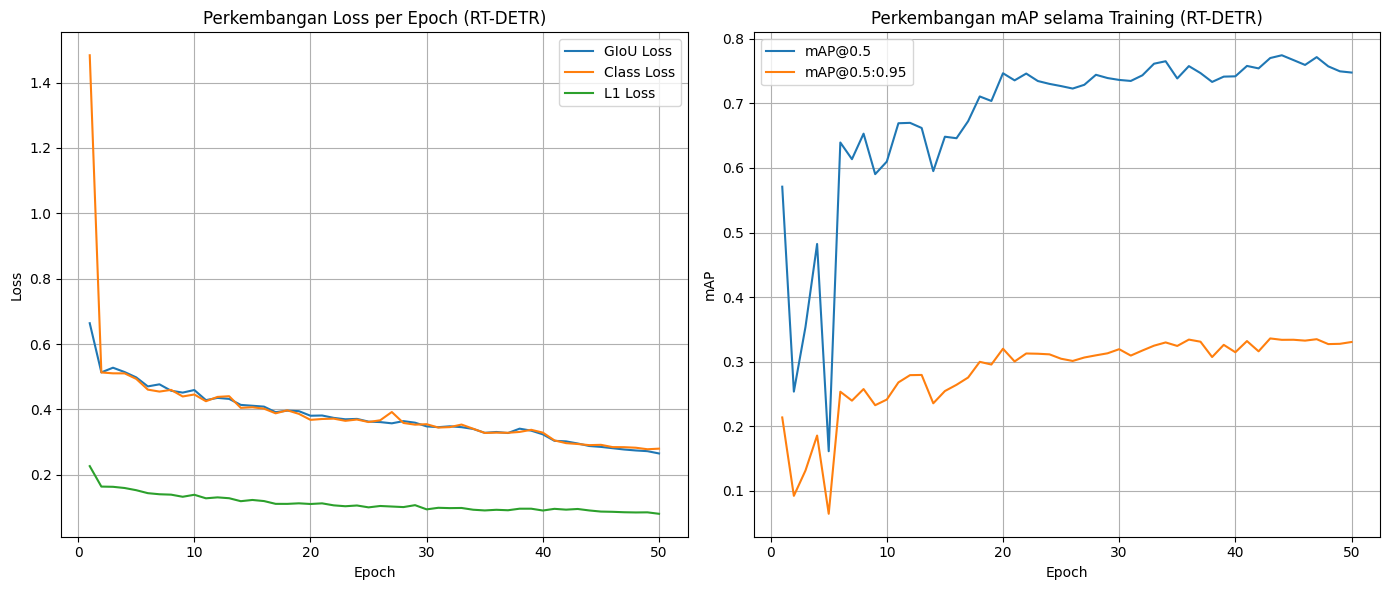

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file hasil training
results_path = "pothole_exp/rtdetr_default/results.csv"
df = pd.read_csv(results_path)

# Cek kolom untuk memastikan
print(df.columns)

plt.figure(figsize=(14,6))

# --- Grafik Loss ---
plt.subplot(1,2,1)
plt.plot(df["epoch"], df["train/giou_loss"], label="GIoU Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Class Loss")
plt.plot(df["epoch"], df["train/l1_loss"], label="L1 Loss")
plt.title("Perkembangan Loss per Epoch (RT-DETR)")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(); plt.grid(True)

# --- Grafik mAP ---
plt.subplot(1,2,2)
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@0.5")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")
plt.title("Perkembangan mAP selama Training (RT-DETR)")
plt.xlabel("Epoch"); plt.ylabel("mAP")
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()


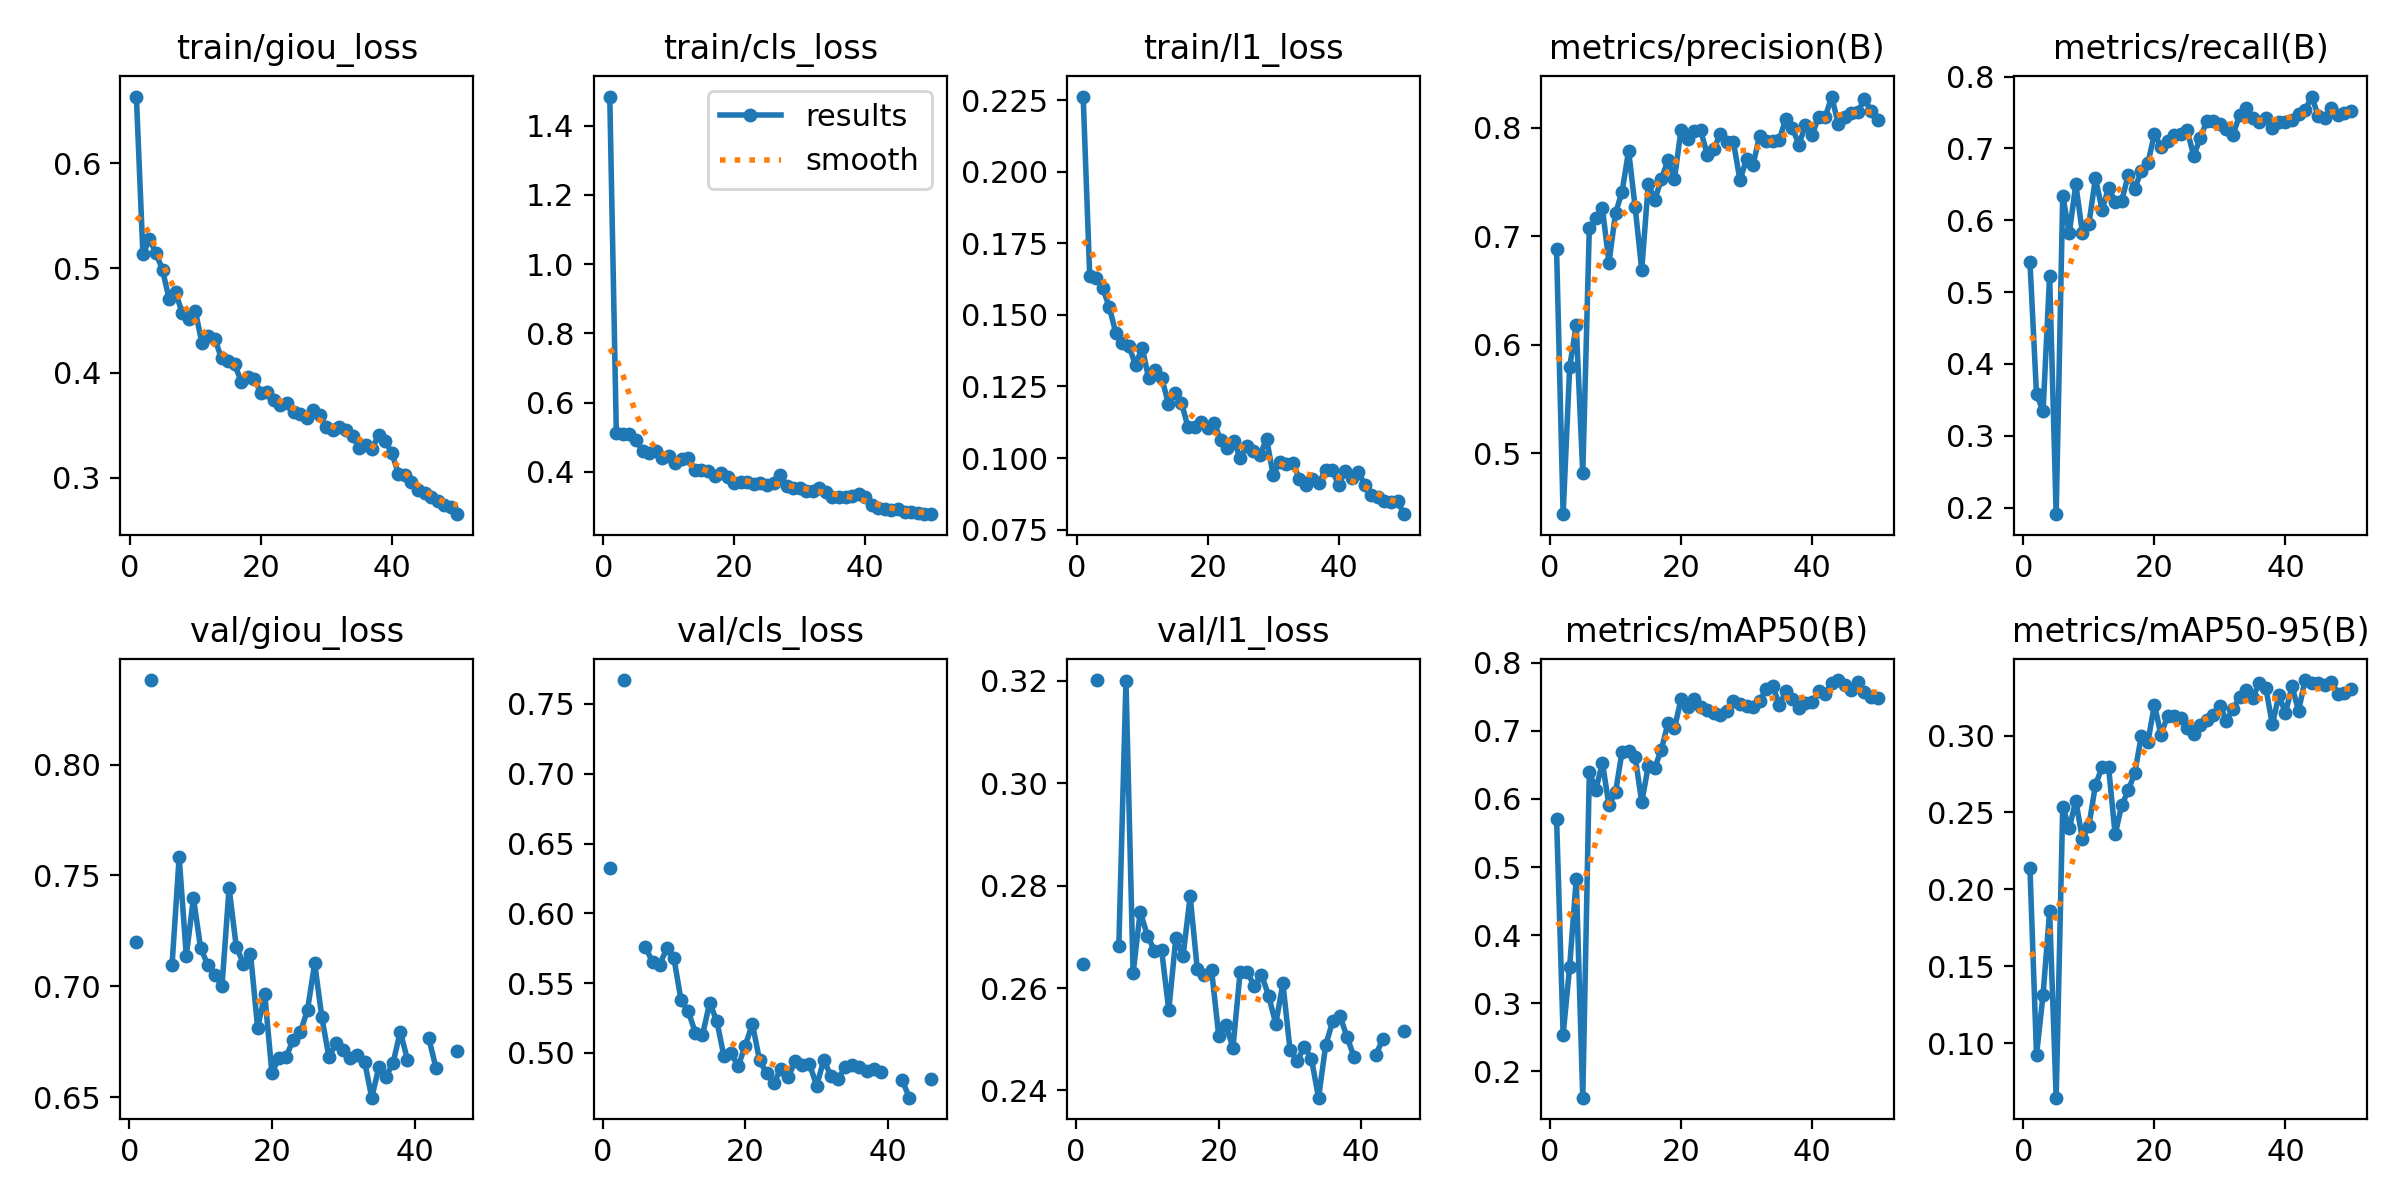

In [ ]:
from IPython.display import Image
Image(filename="pothole_exp/rtdetr_default/results.png")


In [ ]:
from ultralytics import YOLO
import os, cv2, random, time
import pandas as pd
import matplotlib.pyplot as plt


image 1/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0000_jpg.rf.e62dd31f0fa7f17d98426589e78d9d92.jpg: 640x640 3 Pothole-s, 74.4ms
image 2/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0001_jpg.rf.25a333b82f7b18d7d42953d2d9e04b80.jpg: 640x640 3 Pothole-s, 69.6ms
image 3/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0003_jpg.rf.6948adc40197af0e4ae03d10aad4b992.jpg: 640x640 3 Pothole-s, 62.0ms
image 4/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0004_jpg.rf.d57477de1c6b8150d72d22531e689c17.jpg: 640x640 2 Pothole-s, 61.2ms
image 5/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0005_jpg.rf.adaad5c209173bf0ca57d27f25b7ef85.jpg: 640x640 3 Pothole-s, 48.9ms
image 6/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0006_jpg.rf.9e269f329a3bc09957f528ec436e7167.jpg: 640x640 4 Pothole-s, 44.5ms
image 7/533 /content/Pothole-detection-9/test/images/20240220_062158_mp4-0007_jpg.rf.4c587034

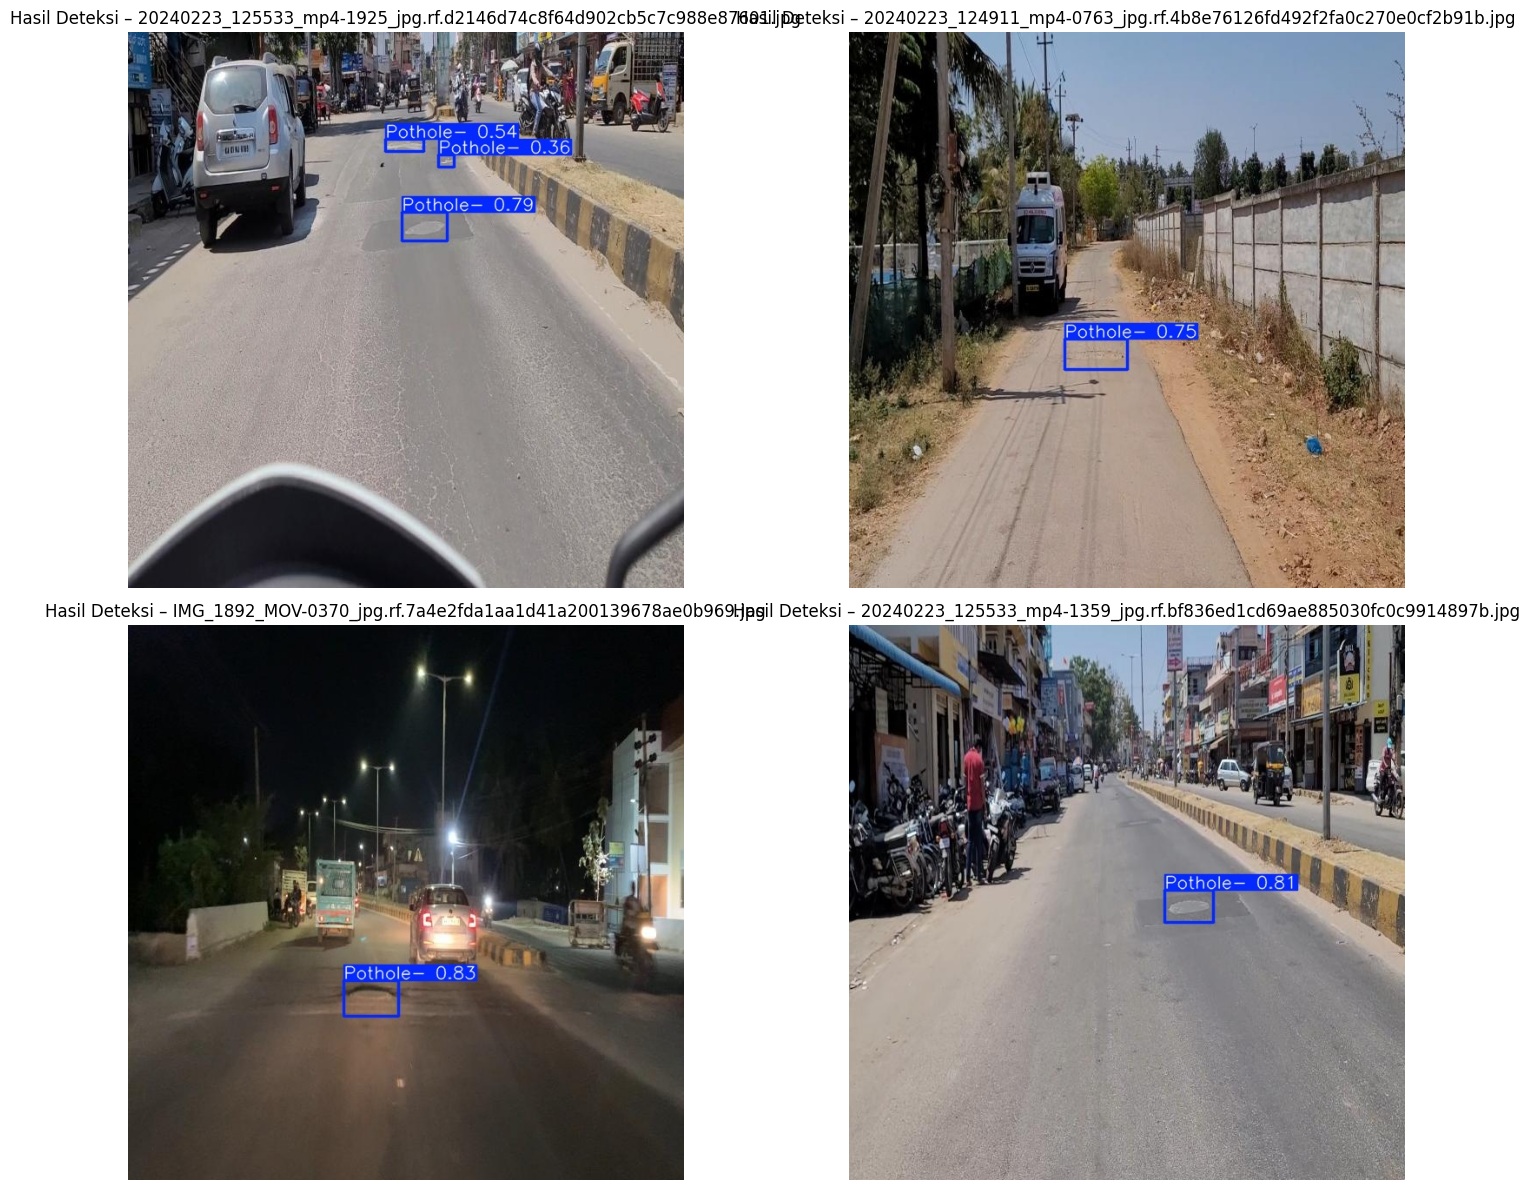

In [ ]:

# --- 🖼️ VISUALISASI HASIL DETEKSI BASELINE ---
pred_results = model.predict(
    source="Pothole-detection-9/test/images",
    conf=0.25,
    save=True,
    project="runs",
    name="rtdetr_test"
)

output_dir = "runs/rtdetr_test"

fixed_images = [
    "20240223_125533_mp4-1925_jpg.rf.d2146d74c8f64d902cb5c7c988e87601.jpg",
    "20240223_124911_mp4-0763_jpg.rf.4b8e76126fd492f2fa0c270e0cf2b91b.jpg",
    "IMG_1892_MOV-0370_jpg.rf.7a4e2fda1aa1d41a200139678ae0b969.jpg",
    "20240223_125533_mp4-1359_jpg.rf.bf836ed1cd69ae885030fc0c9914897b.jpg",
]

## Pastikan file-file tersebut ada di folder hasil prediksi
available_images = [f for f in fixed_images if os.path.exists(os.path.join(output_dir, f))]

if not available_images:
    print("⚠️ Gambar yang dipilih tidak ditemukan di folder hasil prediksi.")
else:
    plt.figure(figsize=(16, 12))
    for i, img_file in enumerate(available_images):
        img_path = os.path.join(output_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Hasil Deteksi – {img_file}")
    plt.tight_layout()
    plt.show()